# Pandas via Jupyter for manipulating basic tabular data

## Part 1: Getting used to Jupyter and reading in CSV data

Welcome to **Jupyter Notebooks**! You probably installed Juypter via **Anaconda**. Anaconda is a suite of data science resources: one of the apps it installs is Jupyter (another especially useful one is VS Code). Jupyter is a workbook-style approach to implementing **Python** code. Python relies upon **libraries**, which are collections of functions relating to a particular task. **Pandas** is one of the more popular libraries aimed at working with tabular data, which can also approximate the functionality of a **relational database**.

That is a mouthful, but the point is that we are going to use Pandas (a Python library) to manipulate and visualize tabular data, usually through the Jupyter interface. Pandas is hardly the only tool we could use to implement a relational database. Microsoft Access, Filemaker, and SQL (the latter of which refers to a language, not a particular app) are all also relational database. Pandas is free, open source, and (in my subjective opinion) easier to learn than the others.

Jupyter Notebooks operate in "cells". Each cell can be executed individually or sequentially to implement Python code. In addition to implementing Python code, a cell (such as this one) can also render Markdown formatting when you wish to focus on the text.

In [54]:
# The pounds sign designates a comment (i.e., not computationally active) within a cell that otherwise executes code.
# Let's try a very basic Python function, which is simply to print text:

print ("this is more Python text")

# pretty simple, but note that in any kind of coding the syntax really matters 
# (e.g. that the text you wish to display is in quotation marks, etc.)

this is more Python text


"Vanilla" Python can do all sorts of useful things: automate tasks using logical loops, basic mathematics, etc. It can even do some basic stuff with tabular data. But most data scientists move straight to Pandas for a broader range of functionality. So the first thing we need to do is "summon" Pandas. This next step unlocks many of the command we will use going forward.

In [55]:
# Importing the library (it could take a moment to load)
import pandas as pd

As historians, we differentiate between our *primary source*, which we try to keep in its original state, and our notes / transcription / markup of that text. In other words, if you want to work with a Byzantine manuscript, for instance, you could highlights part of the PDF, or transcribe it into a text file, but you would never write on the original document. Data science is no different: usually we *read in* data from a file (a CSV file, for instance), but once it is read in, you are working with a copy of the original document. You can modify the original document if you wish, but you don't have to, and would rarely want to do so.


Let's start by doing something very simple: reading in a CSV file, saving it as a local variable, and then looking at it.

In order to "read in" a file as a local variable, however, we need to know where it "lives," which brings us to the idea of **path**. The files on your computer are organized hierarchically, like a tree. The "path" is the sequence of steps that you have to "walk" in order to go from the **root** to the file you are looking for.


In [56]:
# Read in the dataframe
df = pd.read_csv("/Users/PICKETTJ/Dropbox/Active_Directories/Teaching/Graduate_Seminars/Historical_Methods_spring2025/Class_Exercises_Methods/initial_student_tabular_data/chrvalaandrew_Military_Strength_DDR.csv")


Some notes about this first, basic step:
    
The logic here is that this variable_name (here `df` for 'dataframe', but you can call it anything you like) will now designate the local version of the CSV file, which is now stored in t dataframe (a tabular data type specific to Pandas), found at the following path location.

Therefore, if you modify dataframe `df` in any future code, it will not alter the information in your CSV file (unless you explicitly tell it to). It also means that if you rename or move the source file, the code will deliver an error message if you try to run it again.  
    
    
Now let's check to make sure it read in properly:

In [57]:
# display the dataframe information simply by inputting the variable name and executing the code

df

,Component,HQ,Personnel (Peak)
0,NVA,Strausberg,"223,000"
1,LaSK,Geltow,"105,000"
2,VM,Rostock,"27,000"
3,LSK,Strausberg,"44,000"
4,Grenztruppen,Paetz,"47,000"
5,MFSS,Lichtenberg,"91,000"
6,Vopo,Berlin,"275,000"
7,KDA,Berlin,"210,000"
8,NaN,NaN,"799,000"


In [58]:
# get some basic descriptive information about the dataframe
df.describe()

,Component,HQ,Personnel (Peak)
count,8,8,9
unique,8,6,9
top,NVA,Strausberg,"223,000"
freq,1,2,1


## Part 2: Relating tables to one another

Now we are going to use Pandas functions to relate two or more tables to one another.

In a table, columns represent a one-to-one relationship between values. This means that each value in one column corresponds directly to exactly one value in another column.

But what if you want to represent a one-to-many relationship, with data captured in separate tables? For instance, imagine that you have a table tracking information about an individual (and within that table, each column represents a one-to-one relationship between that individual as an entity and a piece of information, e.g. one indivudal has one name, one age, etc.), and then another table tracking information about organizations. To model a one-to-many relationship, let's pretend that each individual can only be a member of one organization. Our two tables might look like this:

Table 1: Historical Figures
| ID | Name               | Birth_Year | Organization_ID |
|----|-------------------|------------|-----------------|
| 1  | Otto von Bismarck | 1815       | PRU1           |
| 2  | Karl Marx         | 1818       | INT1           |
| 3  | Rosa Luxemburg    | 1871       | SPD1           |
| 4  | Friedrich Engels  | 1820       | INT1           |
| 5  | August Bebel      | 1840       | SPD1           |

Table 2: Organizations
| Organization_ID | Name                     | Location | Founded |
|----------------|--------------------------|----------|---------|
| PRU1           | Prussian State Ministry  | Berlin   | 1848    |
| INT1           | First International      | London   | 1864    |
| SPD1           | Social Democratic Party  | Gotha    | 1875    |

The relationship illustrated above is a one-to-many relationship, because each individual can only be a member of one organization, but each organization can have many individuals.

*Join keys* are the columns that connect the two tables. In this case, the `Organization_ID` column in Table 1 connects to the `Organization_ID` column in Table 2. Join keys are relative to context: the `Organization_ID` column in Table 1 is the foreign join key, but that same value in Table 2 is the primary key.

And this is the real limitation of a spreadsheet program like Excel: you could eyeball those join columns and look up a relationship on your own, but Excel cannot make these relationships on its own. Using a spreadsheet program like Excel can be useful for entering and maintaining the raw data, but when you want to see the relationships between the data, you need to use a tool like Pandas.

Now let's read in some real historical tabular data and illustrate how Pandas can be used to relate two tables to one another.

To read in the data, first I need the path. In the example above, I copied the absolute path to the file (i.e., directions from your root directory all the way down to whatever folder and file name you are using), but you can also use a *relative path* if you wish: directions from the current working directory, which is by default wherever the Jupyter notebook is saved.

> *By the way*: it is best practice to avoid white spaces in your file names. This is because in some apps or computing languages white spaces can be *computationally active*, indicating (for instance) that the next word is a command, or that the next word is part of the file name. This is why you see file names like `my_data.csv` instead of `my data.csv`. If you already have white spaces, it's usually not too difficult to find a workaround, but why not avoid the extra step?

An example of a relative path: `df = pd.read_csv('data/my_data.csv')`: it will look for a file called `my_data.csv` in the `data` folder within the same directory as the Jupyter notebook.

However, I maintain some of my Jupyter notebooks in a folder far removed from my source data. Therefore, to keep things readable, I am going to create a few variables that stand in for much of my absolute path to where I want to go. That way, if I want to work from another computer, I can just change the variables

In [59]:
# setting a variable for my home directory: this is simply a string (i.e., string of characters) representing the path to the directory where I keep my source data

hdir = '/Users/PICKETTJ/Dropbox/Active_Directories/Teaching/Graduate_Seminars/Historical_Methods_spring2025/Class_Exercises_Methods/'

# this way I can easily change the path for every individual time I read something in down the line


# Now I can use the variables to read in the data: the `+` operator is used to concatenate strings
records = pd.read_csv(hdir + 'records.csv')
archives = pd.read_csv(hdir + 'archives.csv')


In [60]:
# the .head() function is a quick way to look at the first few rows of a dataframe (which are often longer than you want to look at all at once)
records.head()

,UID,Call_No,Title,Foreign_Key
0,72,i126-1-230-1,,2
1,73,i126-1-522-2,Ariza bukharskikh chonovnikov koshbegi o zhalo...,2
2,79,i126-1-1756-2,NaN,2
3,89,i126-1-1867-2,Ariza chinovniki Kushbegi ob otbore devushek d...,2
4,91,i126-1-1867-1,Ariza chinovniki Kushbegi ob otbore devushek d...,2


In [61]:
archives.head()

,UID,Acronym,Title,Non-English_Title
0,1,O‘zRFA ShI,The al-Beruni Institute of Oriental Studies of...,O‘zbekiston Respublikasi Fanlar akademiyasi Ab...
1,2,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
2,3,TSARI APSA,Telangana State Archives & Research Institute,NaN
3,4,IVANTaj,"Institute of Language, Literature, Oriental an...","Institut iazyka, literatury, vostokovedeniia i..."
4,5,IVR RAN,Institute of Oriental Manuscripts of the Russi...,Institut vostochnykh rukopisei Rossiiskoi akad...


Now we can see that these CSV files were successfully read in as Pandas dataframes.

What we have here are two separate tables: one tracking information about individual archival records, the other tracking information about the archives themselves. Logically, one record can only be housed in one archive, so this is a one-to-many relationship. The final column in the `records` dataframe, `archive_id`, is the foreign key that connects to the `id` column in the `archives` dataframe.

Now let's join the two tables together so that we can view the archive repository information alongside the records.


In [62]:
# Merge the records and archives dataframes
merged_df = pd.merge(
    records,                # left dataframe
    archives,              # right dataframe
    left_on='Foreign_Key', # column from records
    right_on='UID',        # column from archives
    how='left'             # keep all records entries, even if no matching archive
)

# Look at the first few rows of the merged result
merged_df.head()

,UID_x,Call_No,Title_x,Foreign_Key,UID_y,Acronym,Title_y,Non-English_Title
0,72,i126-1-230-1,,2,2,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
1,73,i126-1-522-2,Ariza bukharskikh chonovnikov koshbegi o zhalo...,2,2,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
2,79,i126-1-1756-2,NaN,2,2,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
3,89,i126-1-1867-2,Ariza chinovniki Kushbegi ob otbore devushek d...,2,2,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
4,91,i126-1-1867-1,Ariza chinovniki Kushbegi ob otbore devushek d...,2,2,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi


Note that your source data in the CSV files is untouched by any of this: if you were to update your files (e.g. with a new record or new archive), and then ran the cells again, your dataframe would reflect those changes.

Unless we choose to export it as a CSV file (which would be easy to do: `merged_df.to_csv('merged_data.csv', index=False)`), `merged_df` is a local copy of the merged dataframe. Which means we can mess around with it without harming anything. So let's clean up those column names a bit:

- Now that we've merged the two dataframes, we don't need separate columns for the UID in the archives dataframe and the Foreign_Key in the records dataframe: they are the same.
- Pandas noticed that we have duplicate column names in the two tables and so differentiated between them with the `_x` and `_y` suffixes. Let's clarify.


In [63]:
# Clean up the merged dataframe's column names
merged_df = merged_df.rename(columns={
    'UID_x': 'Record_ID',          # original ID from records table
    'Title_x': 'Record_Title',     # title from records table
    'Title_y': 'Archive_Name',     # title from archives table
    'Acronym': 'Archive_Acronym'   # keep this clear it's from archives
})

# Drop redundant columns (the foreign key and archive UID since they're the same)
merged_df = merged_df.drop(['Foreign_Key', 'UID_y'], axis=1)

# Look at the result
merged_df.head()

,Record_ID,Call_No,Record_Title,Archive_Acronym,Archive_Name,Non-English_Title
0,72,i126-1-230-1,,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
1,73,i126-1-522-2,Ariza bukharskikh chonovnikov koshbegi o zhalo...,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
2,79,i126-1-1756-2,NaN,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
3,89,i126-1-1867-2,Ariza chinovniki Kushbegi ob otbore devushek d...,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi
4,91,i126-1-1867-1,Ariza chinovniki Kushbegi ob otbore devushek d...,O‘zR MA,National Archive of the Republic of Uzbekistan,O‘zbekiston milliy arxivi


This is already pretty useful. It will be even more useful when we start making many-to-many relationships. For instance, it would be pretty simple to do something like have this merged table automatically produce a pre-formatted citation for each record: all you are doing is pulling information from the relevant columns and adding some formatting to it (e.g., quotation marks).

### Many-to-many relationships

As historians, quite often we are in many-to-many relationships. For instance, if I have a table with information about places, and a table with information about people, and I want to track which people have been to which places, I have a many-to-many relationship: any single location on the locations table could have multiple people associated with it, and any individual person could have been to multiple locations.

Illustrating this relationship requires at least three tables: two that track information about the people and places, and a third that tracks the actual relationships between them. This third table is called a *join table*.

For instance, your data could look something like this:

**People Table**
| Person_ID | Name | Origin | Active_Period |
|-----------|------|---------|---------------|
| P1 | Marco Polo | Venice | 1271-1295 |
| P2 | Ibn Battuta | Tangier | 1325-1354 |
| P3 | Francesco Pegolotti | Florence | 1310-1347 |
| P4 | Zhang Qian | Chang'an | 138-114 BCE |
| P5 | Afanasy Nikitin | Tver | 1466-1472 |

**Locations Table**
| Location_ID | City | Region |
|-------------|------|---------|
| L1 | Constantinople | Byzantine Empire |
| L2 | Samarkand | Central Asia |
| L3 | Guangzhou | Southern China |
| L4 | Calicut | Malabar Coast |
| L5 | Alexandria | Egypt |

**Visits Table (Join Table)**
| Visit_ID | Person_ID | Location_ID | Visit_Year | Purpose |
|----------|-----------|-------------|------------|---------|
| V1 | P1 | L2 | 1275 | Silk purchase |
| V2 | P1 | L3 | 1277 | Imperial court visit |
| V3 | P2 | L4 | 1342 | Spice trade |
| V4 | P2 | L5 | 1326 | Religious study |
| V5 | P3 | L1 | 1324 | Market research |
| V6 | P4 | L2 | 128 BCE | Diplomatic mission |
| V7 | P5 | L4 | 1468 | Diamond trade |
| V8 | P1 | L1 | 1271 | Departure point |
| V9 | P2 | L1 | 1332 | Transit stop |

Note that in the "Visits" table, Visit_ID is the primary key, and Person_ID and Location_ID are foreign keys corresponding to the primary keys in the "People" and "Locations" tables, respectively.

Now let's read in some real data and see how we can use Pandas to relate these tables to one another.

In [64]:
# read in three CSV files, one for each table

people = pd.read_csv(hdir + 'people.csv')
locations = pd.read_csv(hdir + 'locations.csv')
visits = pd.read_csv(hdir + 'itinerary_loc-pers-join.csv')


In [65]:
# check to make sure the data was read in correctly
# locations.head()
# visits.head()
# people.head()

Once we are certain the data was read in correctly, we can merge the tables together:

In [66]:
# First merge visits with locations
visits_locations = pd.merge(
    visits,                # left
    locations,            # right
    left_on='Location_ID',  # join key from visits
    right_on='Loc_ID',    # join key from locations
    how='left'            # keep all visits entries
)

# Then merge the result with people
merged_all = pd.merge(
    visits_locations,     # left 
    people,              # right
    left_on='Person_ID',  # join key from visits
    right_on='Pers_ID',  # join key from people
    how='left'           # keep all visits entries
)

# Clean up column names and drop redundant IDs
merged_all = merged_all.rename(columns={
    'Loc_Name': 'Location_Name',  # from locations table
    'Name': 'Person_Name',        # from people table
})

# Drop redundant ID columns that came from the merges
merged_all = merged_all.drop(['Loc_ID', 'Pers_ID'], axis=1)

# Look at the result
merged_all.sample(5)
# sample is kind of like head(), but displays a random sample of however many rows you specify between the parentheses

,Person_ID,Location_ID,Purpose,Arrival,Departure,Location_Name,Person_Name
16,943,206,trade / work,1888.000000,1888.000000,NaN,Mahmud Khwaja
19,1033,274,imam,1943.000000,1947.000000,Khwaja Zayn al-Din Khwajai Turk,"Ishan Yahya Khan ""Eshon O'roq"""
4,66,52,qazi,1895.474977,1896.445206,Zinda-nay Khitfar Pīshkūh,Sadr-i Ziya
25,1113,295,service,1890.000000,1896.000000,Russian Political Agency in Bukhara Residency ...,"Lessar, Pavel Mikhailovich"
6,66,111,qazi,1893.534519,1894.504748,Yangi Qurghan Kani-mikh Yangiqo‘rg‘on,Sadr-i Ziya


This looks pretty good, though I find the ordering of the columns counterintuitive, and the extra decimal places for the dates are annoying. (It has to do with the way Pandas assumes datatype when it is not specified explicitly.)

In [67]:
#reorder the columns:

merged_all = merged_all[['Person_ID', 'Person_Name', 'Location_ID', 'Location_Name', 'Purpose', 'Arrival', 'Departure']]

# Format Arrival and Departure columns as integers (no decimal places)
merged_all['Arrival'] = merged_all['Arrival'].astype(int)
merged_all['Departure'] = merged_all['Departure'].astype(int)

merged_all.head()

,Person_ID,Person_Name,Location_ID,Location_Name,Purpose,Arrival,Departure
0,70,"Badr al-Din ""Raja""",3,Bukhāra (city),qazi,1889,1908
1,73,Burhan al-Din,3,Bukhāra (city),qazi,1913,1920
2,73,Burhan al-Din,30,Karmīna Kermina (city) Navoiy,exile,1910,1913
3,472,"Abd al-Karim ""Sindi""",14,Mecca,hajj,1906,1908
4,66,Sadr-i Ziya,52,Zinda-nay Khitfar Pīshkūh,qazi,1895,1896


There we go! Much easier to read. This would be a good time to emphasize that I do not have the code for removing decimal places, or even rearranging columns, memorized: I have to look it up, which is *much* easier these dates with AI.

### Next steps

For the purposes of our class, this is as far as you need to go. I would like you to leave with an ability to make basic associations between tables, or at least have a conceptual idea of how you might do so if it becomes helpful later on. For me, tracking various information is a basic part of my workflow. I have tables for information about places, people, organizations, events, words, and more, and I add to them on a daily basis.

If you are with me so far, let's take a slightly closer look at how you might take advantage of a joined table such as the one we created above, and potential next steps you might take to leverage it even further.

Most immediately, the join table above already allows us to produce some basic descriptive data and even charts. For instance, let's say we want to know the most common destinations for people traveling after 1890.

In [68]:
# Filter for arrivals after 1890
post_1890 = merged_all[merged_all['Arrival'] > 1890]
# this creates a new dataframe variable that only includes rows where the 'Arrival' column is greater than 1890

# Get value counts for Location_Name (most frequent destinations)
print("Most common destinations:")
print(post_1890['Location_Name'].value_counts().head())

print("\nMost common purposes:")
print(post_1890['Purpose'].value_counts().head())



Most common destinations:
Location_Name
Russian Political Agency in BukharaResidency of the Russian Political Agent    4
Bukhāra (city)                                                                  2
QarshīNasafNakhshab                                                           2
Yangi QurghanKani-mikhYangiqo‘rg‘on                                           2
Manghit Bukhara (polity)                                                        1
Name: count, dtype: int64

Most common purposes:
Purpose
qazi        10
service      4
ra'is        3
governor     2
imam         2
Name: count, dtype: int64


If we want to make a visualization of some of this information, then we can simply import a new library, the same way we did with Pandas. There are libraries for geospatial analysis, network analysis, and graphs. Let's try a graph.

In [69]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# note: depending on how you installed Jupyter, you may need to first run conda install matplotlib or pip install matplotlib


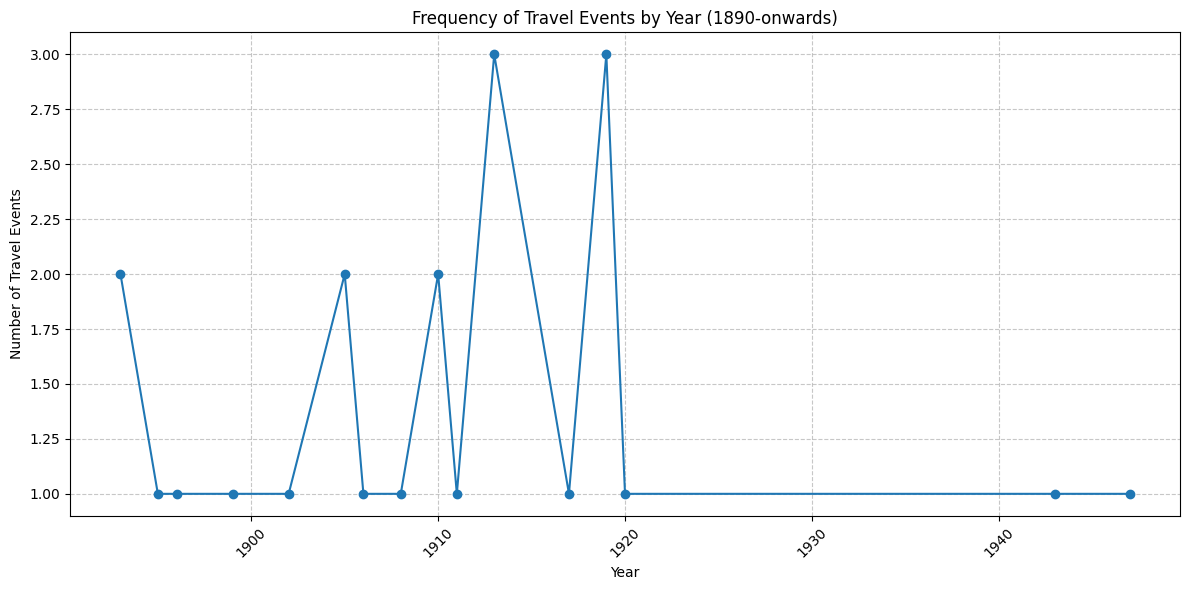

In [70]:
# Count frequency of each arrival year
yearly_counts = post_1890['Arrival'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o')

# Customize the plot
plt.title('Frequency of Travel Events by Year (1890-onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Travel Events')
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

Other kinds of visualizations require other libraries, or different apps. The input format for most of the visualizations you might be familiar with is tabular data. So if you wanted to visualize a social network, you could either [import a library directly](https://trenton3983.github.io/posts/intro-network-analysis/) to your Jupyter notebook, or export the data to a CSV file and open it in a GUI (graphical user interface, i.e. as opposed to a command line interface like Jupyter) like Gephi or Cytoscape. Either way, you need your relational database. Similarly, if you wanted to illustrate this data spatially, you could import a library like [Geopandas](https://geopandas.org/en/stable/), or export the data to CSV and open it in a GUI like QGIS or ArcGIS. 

#### Some thoughts on workflow

If you wish to integrate a relational database into your research, it is worth thinking a bit about how you will maintain it, because there are trade-offs, which I am happy to discuss in greater detail on an individual basis.

Perhaps the simplest option is to maintain the raw data in CSV files you modify using Excel. For instance, every time you want to add a new individual to your individuals table, you would simply open up the Excel file and so so. When you run your Jupyter notebook again, it will update with those changes automatically. You could even use Excel functionality to automatically produce unique IDs every time you add a new row, and you could use the pretty Excel formatting to keep things easily readable. (When you exported to CSV you would lose that formatting, which is no matter, since you would be reading it into a Jupyter notebook anyway.)

There are drawbacks to this approach, which have to do with why I wrote at the beginning of this tutorial that we will be *approximating* a relational database. For instance, a given spreadsheet would not be aware of any of the relationships you are mapping using Pandas, which means you would have to manually look up join keys as you were entering data. Not the end of the world, but but a limitation *actual* relational databases are designed to address.

So another option would be to learn to manage a legitmate relational database. The best option is probably SQLite, which is a format that you can read in directly to Pandas. (Indeed, the CSV files I read in above were first exported from an actual relational database I use.) You would still interact with the tabular data in a manner similar to the tutorial above, except that you would only have to use the one file, could also use SQL commands to query data, and would have more robust safeguards in place for data entry. Probably this is overkill for what many of you will need, but you should be aware of it.